In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
import pandas as pd

### Gaussian normal distribution(normal distribution)--pdf
- most common used probabiltiy model for being used when modeling the events occur in reality environment. 
- it is defined only two components ( mu, square of sigma)
- when mu = 0, square of sigma =1 then it is called ' standard normal distribution'

In [4]:
mu=0
std =1
rv= sp.stats.norm(mu,std)
rv

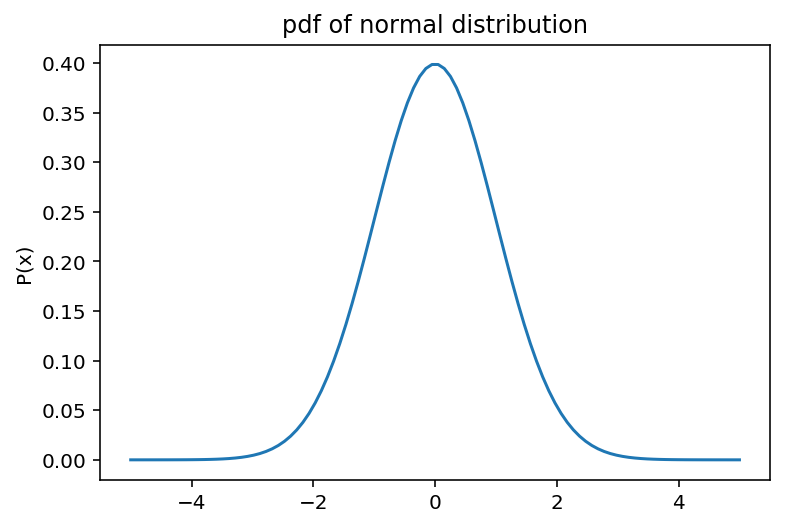

In [5]:
xx = np.linspace(-5,5,100)
plt.plot(xx,rv.pdf(xx))
plt.ylabel('P(x)')
plt.title('pdf of normal distribution')
plt.show()

In [7]:
x=rv.rvs(100,random_state=0)
x[:5]

array([1.76405235, 0.40015721, 0.97873798, 2.2408932 , 1.86755799])

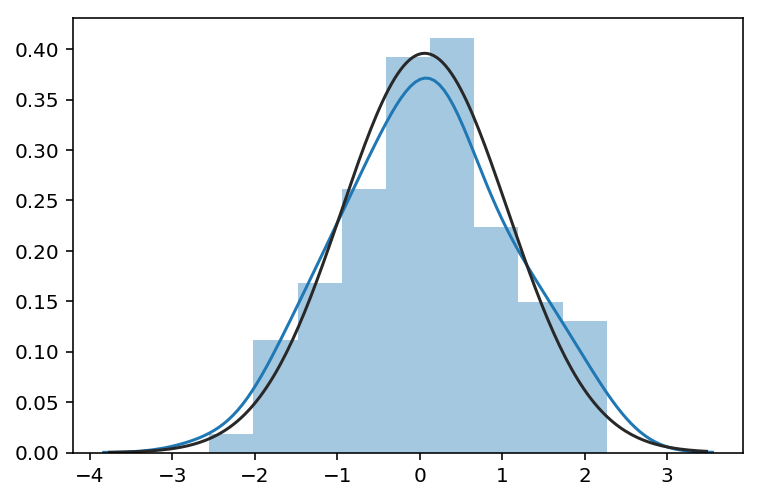

In [8]:
sns.distplot(x,kde=True,fit=sp.stats.norm)
plt.show()

### Q-Q 플롯
정규 분포는 여러가지 연속 확률 분포 중에서도 가장 유용한 특성을 지니며 most commonly used probabiltiy distribution이다. 따라서 확률 변수의 분포가 normal 한지의 여부성 판단도(normality test : 정규 분포 검정) 가장 중요한 통계적 분석 중의 하나이다. 구체적인 정규 분포 검정을 사용하기에 앞서 간단하게 정규 분포를 확인하는 Q-Q 플롯을 사용할 수 있다.

Q-Q(Quantile-Quantile) 플롯은 분석하고자 하는 샘플 데이터의 분포와 정규 분포의 분포 형태를 비교한느 시각적 도구이다. Q-Q 플롯은 동일 분위수에 해당하는 정상 분포의 값과 주어진 분포의 값을 한 쌍으로 만들어 scatter plot으로 그린 것이다. 

- 1) 대상 샘플 데이터를 크기에 따라 sorting
- 2) 각 샘플 데이터의 quantile function value, 즉 전체 중에 몇 %에 해당하는지 구한다.
- 3) 각 샘플 데이터의 quantile function vlaue가 정규 분포의 cdf value가 되는 quantile
- 4) 샘플 데이터와 그에 대응하는 정규 분포 값을 하나의 couple로 2 dimension에 pointing
- 5) 모든 샘플에 대해서 2~4 looping! scatter plot and other plot forming

probplot은 기본적으로 인수로 보낸 데이터 샘플에 대한 Q-Q 정보만을 반환하고 챠트는 그리지 않는다. 만약 차트를 그리고 싶다면 plot 인수에 matplotlib.pylab 모듈 객체 혹은 Axes 클래스 객체를 넘겨주어야 한다.

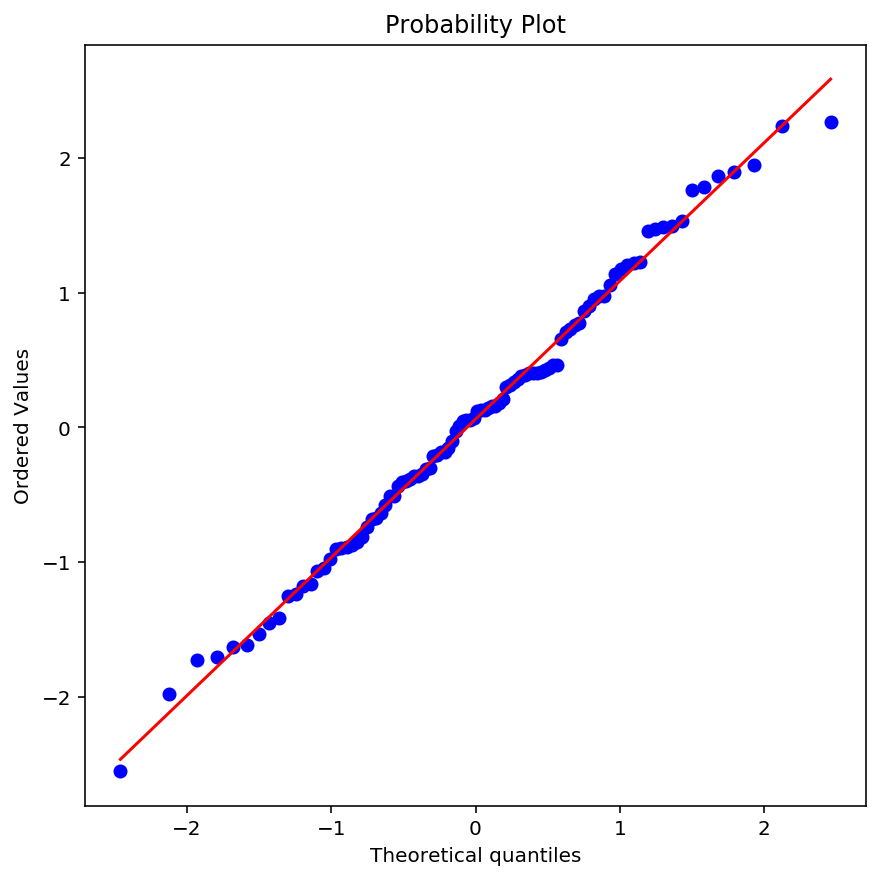

In [11]:
np.random.seed(0)
x=np.random.randn(100)
plt.figure(figsize=(7,7))
sp.stats.probplot(x,plot=plt)
plt.axis('equal')
plt.show()

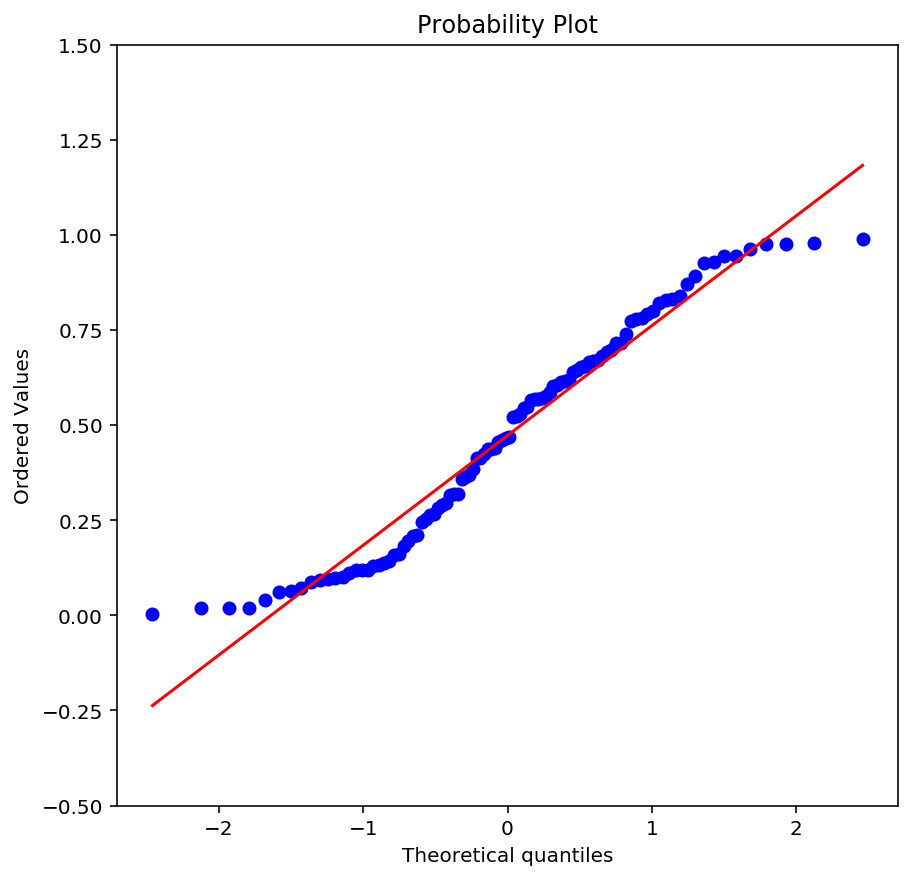

In [17]:
np.random.seed(0)
x=np.random.rand(100)
plt.figure(figsize=(7,7))
sp.stats.probplot(x,plot=plt)
plt.ylim(-0.5,1.5)
# plt.axis('equal')
plt.show()

### Central Limit Theorem 
- 중심 극한 정리는 여러 확률 변수의 합이 정규 분포와 비슷한 분포를 이루는 현상
- X1,X2,...,Xn 가 기댓값이 mu이고, 분산이 square of sigma으로 동일한 모멘트를 가지고 있고 분포는 같거나 달라도 무방하다고 할 때, 즉, 서로 독립인 확률 변수들이라고 할 때, X1,...Xn 에서 뽑은 각각의 샘플 데이터 x1,x2,...,xn의 샘플 평균 xn(bar)도 마찬가지로 예측할 수 없는 확률 변수가 된다.(1/N *(x1+...+xn) 이 확률 변수를 Xn(bar)라고 할 때, 이 샘플 평균이 0, std가 1이 되게끔 nomalize를 해준다. 
- 중심극한 정리에 따르면 정규화된 샘플 평균의 분포는 n이 증가할 수록 표준 정규 분포에 수렴한다.

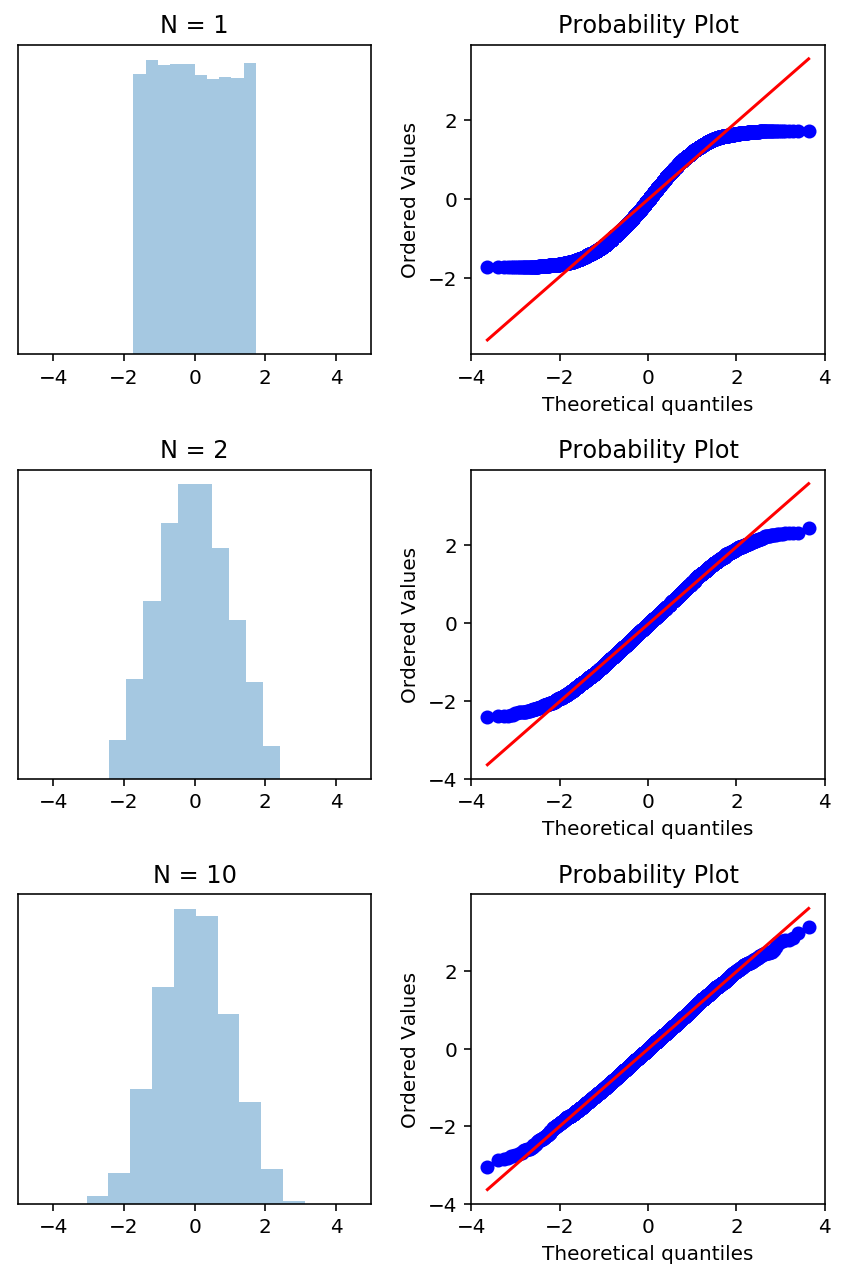

In [28]:
np.random.seed(0)
xx = np.linspace(-2, 2, 100) # x axis 를 allocate
plt.figure(figsize=(6, 9))
for i, N in enumerate([1, 2,10]): #i는 0,1,2 N은 1,2,20이 된다.
    X = np.random.rand(5000, N) # random variable 5000개를 1개씩 ,2개씩,20개씩 return
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * N) #normalize
    ax = plt.subplot(3, 2, 2 * i + 1) # normal distribution을 첫 번째 열에 순서대로~
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    plt.xlim(-5, 5)
    plt.yticks([])
    ax.set_title("N = {0}".format(N))
    plt.subplot(3, 2, 2 * i + 2)# probabiltiy plot을 두 번째 열에 순서대로~
    sp.stats.probplot(Xbar, plot=plt) 

plt.tight_layout()
# Automatically adjust subplot parameters to give specified padding.
plt.show()

더하는 분포의 수가 10개 정도가 되면 그 합은 정규 분포에 상당히 가까워짐을 볼 수 있다.

